## 本节内容
* 线性逻辑回归算法与超参数的代码实现

#### 数据集

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets 
from sklearn import model_selection
from sklearn.datasets import make_classification

In [40]:
x, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=1024,
)

In [41]:
x.shape, y.shape

((200, 2), (200,))

In [42]:
## 划分数据集
x_train,x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=233,train_size=0.7)

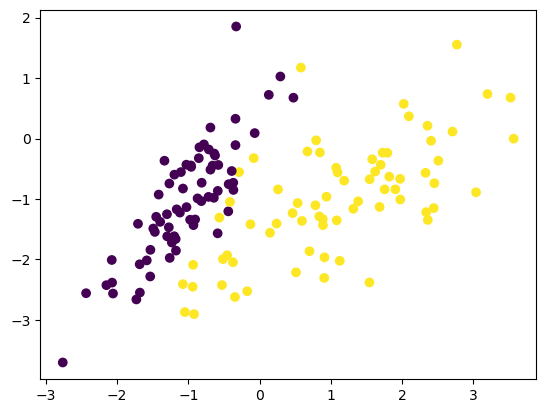

In [43]:
## 样本分布
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
plt.show()

#### 线性逻辑回归

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [46]:
logistic_regression.score(x_train, y_train)

0.95

In [47]:
logistic_regression.score(x_test, y_test)

0.9166666666666666

#### 超参数

In [48]:
from sklearn import model_selection

In [49]:
### penalty是正则项算法
### C是指正则化力度，越小力度越大
### solver是优化的算法，比如梯度下降
params = [{
    'penalty':['l2','l1'],
    'C':[0.0001,0.001,0.01,1,10,100,1000],
    'solver':['liblinear']
},{
    'penalty':['none'],
    'C':[0.0001,0.001,0.01,1,10,100,1000],
    'solver':['lbfgs']
},{
    'penalty':['l2','l1'],
    'C':[0.0001,0.001,0.01,1,10,100,1000],
    'l1_ratio':[0,0.25,0.5,0.75,1],
    'solver':['saga'],
    'max_iter':[200]
}]

In [50]:
grid_cv = model_selection.GridSearchCV(
    estimator = LogisticRegression(),
    param_grid=params,
    n_jobs=-1,
)

In [51]:
grid_cv.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
                          'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
                         {'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
                          'penalty': ['none'], 'solver': ['lbfgs']},
                         {'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [200], 'penalty': ['l2', 'l1'],
                          'solver': ['saga']}])

In [52]:
### 最好的超参数
grid_cv.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [53]:
### 最好的模型
grid_cv.best_estimator_.score(x_test, y_test)

0.9166666666666666